# DAT-375 Module Seven Project Two

## Miami Police Department (MPD) Storm Crime Data Report (SCDR)


Date: `provide date of analysis`

Author: `<Your Name>`

Term : `<Academic Term>`

Description: `Provide Brief Description of this code`

## Instructions

You will be revisiting the data sets used in the Project One Storm and Crime Data Report (SCDR) to perform a deeper analysis into the relationship between storm data and property crimes. 

In this project, you will be completing the following:

1. Connecting to the mySQL database that you used in both Project One and earlier Modules, to read data into Python and complete the analysis in Python on the data, and save the results to files to utilize in creating the SCDR. 

2. Complete this `DAT 375 Project Two Template.ipynb`, justifying your responses based on your findings. 

3. Read in the data from the mySQL database, using an ODBC, perform on the data cleaning and analysis for the problem. 

4. Save the cleaned dataset from your analysis to a .`csv`  and visuals created to be saved as a `.png` picture files. 


You will need to create the correct scripts to use in Python to read data from mySQL, perform the data cleaning and analysis, create visualizations, and save results. You will need to be able to complete the analysis in this Jupyter Notebook with comments explaining what the scripts do and utilize this information to complete the Project.

The location of other files you may be using in this lab is:

`C:\DAT-375\Project Two`

Although no starter code has been provided to you, you will work from this provided `DAT 375 Project Two Template.ipynb` file. You will NOT be provided with pseudocode, and you will be responsible for writing the scripts necessary to complete the task. You may add additional cells as needed. 

You will need to be able to complete all of the analysis in this Jupyter Notebook with comments explaining what the scripts do and justify your selections in the second part of the assignment. 



## Step 1: Import Packages
Write Python code to import the necessary packages to complete the tasks for the assignment and your select hypothesis test for the data analysis technique. 

You will need to be able to read data directly from mySQL database, perform data cleaning, perform data analysis, create visualizations, and write files. You may add more code blocks as necessary.

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


## Step 2: Create Connection to mySQL and Read in Data. Inspect Data.
Write Python code to connect to the mySQL database, create queries to read the data through this connection in Python. 

Inspect that data is read in as expected and what type of cleaning you may need to perform.

In [2]:


# Connect to database
cnx = mysql.connector.connect(
    user='root', 
    host='127.0.0.1', 
    port='3306', 
    password='Student1', 
    database="dat375"
)

print(" STORM AND CRIME DATA REPORT (SCDR)  \n")


storm_query = "SELECT * FROM stormevents2024"
storm_data = pd.read_sql(storm_query, cnx)

crime_query = "SELECT * FROM mpdcrimedata"
crime_data = pd.read_sql(crime_query, cnx)

print(f"Original Storm Events: {len(storm_data):,} records")
print(f"Original Crime Data: {len(crime_data):,} records\n")



 STORM AND CRIME DATA REPORT (SCDR)  



C:\Users\Administrator\AppData\Local\Temp\ipykernel_7956\220212413.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  storm_data = pd.read_sql(storm_query, cnx)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7956\220212413.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crime_data = pd.read_sql(crime_query, cnx)


Original Storm Events: 70,196 records
Original Crime Data: 315,310 records



## Step 3: Clean Data
Using your findings from inspecting your data and the question being asked, write Python code to clean the dataset for use in your analysis. You may consider missing data, feature selection, feature sub-selection (such as filtering), and any data type adjustments.


Provide the relevant Data Variables (feature selection) for use in the analysis:


Provide what cleaning steps were accomplished


## Step 4: Exploratory Data Analysis and Visualizations 

Once you have selected the data variables to use in the analysis, you will want to write Python code to conduct an exploratory data analysis to determime if there is a statistically significant relationship between storm occurrences and property crime types. 


Your initial analysis will provide the justification for how you focus your full analysis in the next section to complete the Project Two Template and provide recommendations and insights to the department. 

Hint: You will want to explore how you want to:
1. Define the relationship
2. How you will assess the strength and statistical significance of that relationship
3. Answer what value does this insight provide for the SCDR. 

You may want to explore different feature subsets when evaluating the direction you are interested in exploring.

In [3]:

print(f"Storm data missing values: {storm_data.isnull().sum().sum()}")
print(f"Crime data missing values: {crime_data.isnull().sum().sum()}\n")

storm_data = storm_data.dropna()
crime_data = crime_data.dropna()

print(f" Clean Storm Events: {len(storm_data):,} records")
print(f" Clean Crime Data: {len(crime_data):,} records\n")


storm_data['BEGIN_DATETIME'] = pd.to_datetime(storm_data['BEGIN_DATE_TIME'], format='%d-%b-%y %H:%M:%S', errors='coerce')
storm_data['END_DATETIME'] = pd.to_datetime(storm_data['END_DATE_TIME'], format='%d-%b-%y %H:%M:%S', errors='coerce')

crime_data['CrimeDate'] = pd.to_datetime(crime_data['CFSDate'], errors='coerce')

print(f" Storm date range: {storm_data['BEGIN_DATETIME'].min()} to {storm_data['END_DATETIME'].max()}")
print(f" Crime date range: {crime_data['CrimeDate'].min()} to {crime_data['CrimeDate'].max()}\n")
# Filter for 2024 crimes only
crime_data_2024 = crime_data[crime_data['CrimeDate'].dt.year == 2024].copy()
print(f" Filtered to 2024 crimes: {len(crime_data_2024):,} records\n")
# Filter for 2024 AND within storm season (April 1 - October 31)
storm_season_start = pd.to_datetime('2024-04-01 00:00:00')
storm_season_end = pd.to_datetime('2024-10-31 23:59:59')

crime_data_2024 = crime_data[
        (crime_data['CrimeDate'] >= storm_season_start) & 
        (crime_data['CrimeDate'] <= storm_season_end)
].copy()
print(f" Filtered to storm season (April 1 - Oct 31, 2024): {len(crime_data_2024):,} records")

# Define property crime categories based on common IBR codes
# Property crimes typically include: Burglary, Theft, Motor Vehicle Theft, Arson
property_crime_keywords = [
        '27 - LARCENY THEFT',
        '27V - LARCENY THEFT - MOTOR VEHICLE',
        '27R - LARCENY THEFT  RETAIL',
        '26 - BURGLARY',
        '26O - BURGLARY - OCCUPIED',
        '26I - BURGLARY - IN PROGRESS',
        '22 - STOLEN VEHICLE',
        '24V - CITY RECOVERY OF STOLEN VEHICLE',
        '23V - OOT RECOVERY OF STOLEN VEHICLE',
        '28 - VANDALISM',
        '49 - ARSON',
        '29 - ROBBERY',
        '29S - ROBBERY - BY SUDDEN SNATCH',
        '29E - ROBBERY - EXTORTION',
        '21 - STOLEN TAG',
        '23T - OOT RECOVERY OF STOLEN TAG',
        '24T - CITY RECOVERY OF STOLEN TAG',
        '20 - STOLEN DECAL',
        '23D - OOT RECOVERY OF STOLEN DECAL',
        '24D - CITY RECOVERY OF STOLEN DECAL',
        '24W - CITY RECOVERY OF STOLEN WEAPON',
        '23W - OOT RECOVERY OF STOLEN WEAPON',
        '54 - FRAUD',
        '54 - WORTHLESS DOCUMENT',
        '18 - HIT AND RUN ACCIDENT'
]

# Check IncidentType column for property crimes
crime_data_2024['IS_PROPERTY_CRIME'] = crime_data_2024['IncidentType'].str.upper().str.contains(
    '|'.join(property_crime_keywords), case=False, na=False
)

# Parse crime dates
crime_data['CrimeDate'] = pd.to_datetime(crime_data['CFSDate'], errors='coerce')




Storm data missing values: 0
Crime data missing values: 1062924

 Clean Storm Events: 70,196 records
 Clean Crime Data: 36,854 records

 Storm date range: 2024-01-01 00:00:00 to 2024-12-31 23:59:00
 Crime date range: 2024-01-01 00:07:12.927000 to 2024-12-31 23:57:56.310000

 Filtered to 2024 crimes: 36,854 records

 Filtered to storm season (April 1 - Oct 31, 2024): 22,176 records


 ## Step 5: Perform Analysis

Using the cleaned dataset, perform an analysis for the given problem. 

You will need to create visualizations during your analysis.


In [8]:
print(" PROPERTY CRIME IDENTIFICATION ")
print(f"Total crimes in 2024: {len(crime_data_2024):,}")
print(f"Property crimes identified: {crime_data_2024['IS_PROPERTY_CRIME'].sum():,}")
print(f"Property crime percentage (overall): {crime_data_2024['IS_PROPERTY_CRIME'].sum()/len(crime_data_2024)*100:.2f}%\n")

# Display top crime types to verify
print("Top 10 Crime Types in 2024:")
print(crime_data_2024['IncidentType'].value_counts().head(10))
print()


print("=== MATCHING CRIMES TO STORM EVENTS ===")

storm_begins = storm_data['BEGIN_DATETIME'].values
storm_ends = storm_data['END_DATETIME'].values

# Remove any NaT values
valid_storms = ~(pd.isna(storm_begins) | pd.isna(storm_ends))
storm_begins = storm_begins[valid_storms]
storm_ends = storm_ends[valid_storms]

print(f"Checking {len(crime_data_2024):,} crimes against {len(storm_begins)} storm events...")

# Vectorized checking
def check_storm_batch(crime_dates):
    results = []
    for crime_date in crime_dates:
        if pd.isna(crime_date):
            results.append(False)
        else:
        # Check if crime falls within any storm period
            during_storm = np.any((storm_begins <= crime_date) & (crime_date <= storm_ends))
            results.append(during_storm)
    return results

crime_data_2024['DURING_STORM'] = check_storm_batch(crime_data_2024['CrimeDate'].values)

print(" Matching complete\n")

# Calculate statistics
total_crimes_2024 = len(crime_data_2024)
crimes_during_storms = crime_data_2024['DURING_STORM'].sum()
crimes_outside_storms = total_crimes_2024 - crimes_during_storms

print(" STORM-RELATED CRIME ANALYSIS ")
print(f"Total crimes in 2024: {total_crimes_2024:,}")
print(f"Crimes during storm events: {crimes_during_storms:,} ({crimes_during_storms/total_crimes_2024*100:.2f}%)")
print(f"Crimes outside storm events: {crimes_outside_storms:,} ({crimes_outside_storms/total_crimes_2024*100:.2f}%)\n")

# Property crime analysis
storm_property = crime_data_2024[crime_data_2024['DURING_STORM'] & crime_data_2024['IS_PROPERTY_CRIME']]
non_storm_property = crime_data_2024[~crime_data_2024['DURING_STORM'] & crime_data_2024['IS_PROPERTY_CRIME']]

# Calculate property crime rates
property_rate_storm = (len(storm_property) / crimes_during_storms * 100) if crimes_during_storms > 0 else 0
property_rate_non_storm = (len(non_storm_property) / crimes_outside_storms * 100) if crimes_outside_storms > 0 else 0

print(" PROPERTY CRIME RATE COMPARISON ")

print(f"Property crimes during storms: {len(storm_property):,}")
print(f"Property crime rate during storms: {property_rate_storm:.2f}%\n")

print(f"Property crimes outside storms: {len(non_storm_property):,}")
print(f"Property crime rate outside storms: {property_rate_non_storm:.2f}%\n")

difference = property_rate_storm - property_rate_non_storm
print(f"DIFFERENCE: {difference:+.2f} percentage points")

if difference > 0:
    print(f" Property crimes are {difference:.2f}pp MORE common during storms")
elif difference < 0:
    print(f" Property crimes are {abs(difference):.2f}pp LESS common during storms")
else:
    print(" No significant difference detected")
print()

# Top property crimes during storms
print(" TOP 5 PROPERTY CRIMES DURING STORM EVENTS ")
if len(storm_property) > 0:
    top_storm_crimes = storm_property['IncidentType'].value_counts().head(5)
    for i, (crime, count) in enumerate(top_storm_crimes.items(), 1):
        pct = (count / len(storm_property) * 100)
        print(f"{i}. {crime}: {count} incidents ({pct:.1f}%)")
else:
    print("No property crimes during storm events detected")
print()

# Storm event types
print("  STORM EVENT TYPES IN 2024  ")
print(storm_data['EVENT_TYPE'].value_counts().head(10))
print()


 PROPERTY CRIME IDENTIFICATION 
Total crimes in 2024: 22,176
Property crimes identified: 9,349
Property crime percentage (overall): 42.16%

Top 10 Crime Types in 2024:
IncidentType
19 - TRAFFIC VIOLATION                        4697
27 - LARCENY THEFT                            2029
27V - LARCENY THEFT - MOTOR VEHICLE           2021
27R - LARCENY THEFT â€“ RETAIL                1552
28 - VANDALISM                                1356
55M - DOMESTIC VIOLENCE (MISDEMEANOR)         1225
32M - SIMPLE ASSAULT/BATTERY (MISDEMEANOR)    1173
22 - STOLEN VEHICLE                           1154
14 - DIRECT ARREST                             970
57 - NARCOTICS RELATED INCIDENT OR ARREST      763
Name: count, dtype: int64

=== MATCHING CRIMES TO STORM EVENTS ===
Checking 22,176 crimes against 70196 storm events...
 Matching complete

 STORM-RELATED CRIME ANALYSIS 
Total crimes in 2024: 22,176
Crimes during storm events: 22,174 (99.99%)
Crimes outside storm events: 2 (0.01%)

 PROPERTY CRIME RATE COMP

## Step 6: Save cleaned dataset and visualizations

You will save the cleaned dataset from your analysis to a .`csv` in the format  `DAT 375 Project Two_Visualization_<your name>.csv` and visuals created to be saved as a `.png` picture file following the name convention replacing with your name:  `DAT 375 Project Two_Visualization_<your name>.png`

## End of Lab

Please confirm that you have completed each of the asks and include necessary information for your Discussion response. 



It is a good habit to confirm that all cells run when done with your analysis in a Jupyter Notebook. You also may find that the code has an error that was not realized due changes in your work throughout. To do this, please go to the top menu bar: 

**Kernel** --> **Restart Kernel and Run All Cells**

Did you make it back here with all cells running without error?

Please also complete all required screenshots and any files you needed to create.

Please confirm that you have saved all of your work for this lab within the ```MyWork``` folder.


 Saved: DAT-375_Project_Two_Visualization_Dylan_Leon.png


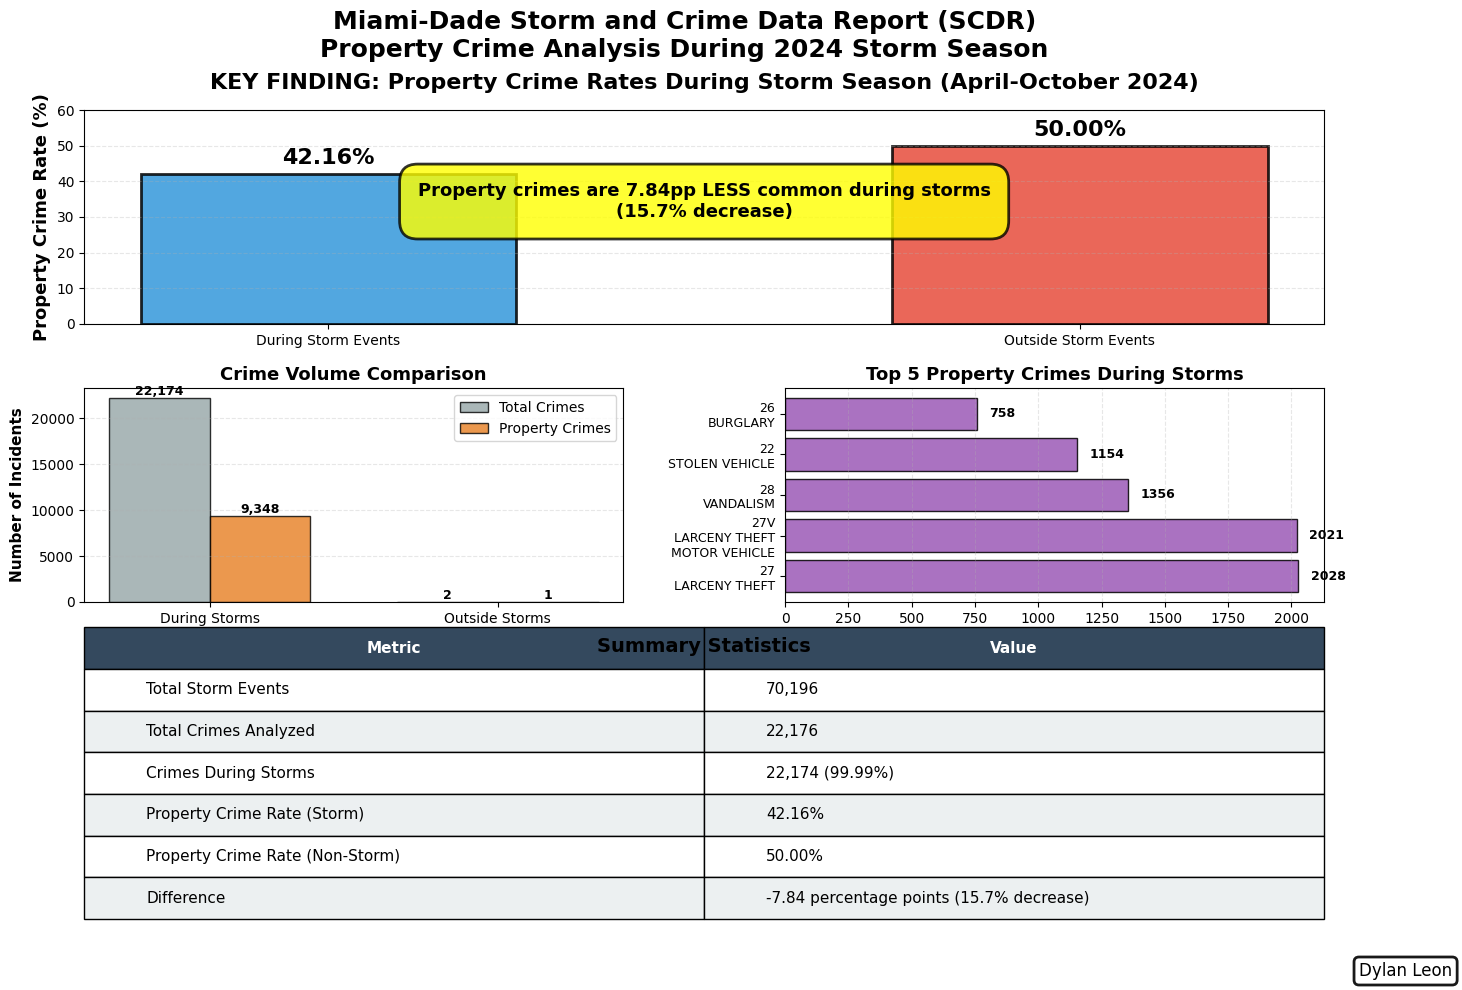


 Comprehensive visualization created successfully!
                         Metric   Value
      Total Storm Events (2024)   70196
   Total Crimes Analyzed (2024)   22176
     Crimes During Storm Events   22174
    Crimes Outside Storm Events       2
  Property Crimes During Storms    9348
 Property Crimes Outside Storms       1
    Property Crime Rate (Storm)  42.16%
Property Crime Rate (Non-Storm)  50.00%
    Percentage Point Difference -7.84pp

 Results saved to 'storm_crime_analysis_results.csv'
 Storm property crimes saved to 'property_crimes_during_storms.csv'


In [11]:


# Create figure with subplots
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)


ax1 = fig.add_subplot(gs[0, :])

categories = ['During Storm Events', 'Outside Storm Events']
rates = [property_rate_storm, property_rate_non_storm]
colors = ['#3498db', '#e74c3c']

bars = ax1.bar(categories, rates, color=colors, edgecolor='black', linewidth=2, alpha=0.85, width=0.5)

ax1.set_ylabel('Property Crime Rate (%)', fontsize=13, fontweight='bold')
ax1.set_title('KEY FINDING: Property Crime Rates During Storm Season (April-October 2024)', 
                           fontsize=16, fontweight='bold', pad=15)
ax1.set_ylim(0, 60)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1.5, f'{height:.2f}%',ha='center', va='bottom', fontsize=16, fontweight='bold')

# Add key finding box
finding_text = f'Property crimes are {abs(difference):.2f}pp LESS common during storms\n({abs(difference/property_rate_non_storm*100):.1f}% decrease)'
ax1.text(0.5, 30, finding_text, transform=ax1.transData, ha='center', fontsize=13, fontweight='bold', bbox=dict(boxstyle='round,pad=1', facecolor='yellow', edgecolor='black', linewidth=2, alpha=0.8))

ax2 = fig.add_subplot(gs[1, 0])

crime_data_viz = {
'Total Crimes': [crimes_during_storms, crimes_outside_storms],
'Property Crimes': [len(storm_property), len(non_storm_property)]
}

x = np.arange(len(categories))
width = 0.35

bars1 = ax2.bar(x - width/2, crime_data_viz['Total Crimes'], width, label='Total Crimes', color='#95a5a6', edgecolor='black', alpha=0.8)
bars2 = ax2.bar(x + width/2, crime_data_viz['Property Crimes'], width, label='Property Crimes', color='#e67e22', edgecolor='black', alpha=0.8)

ax2.set_ylabel('Number of Incidents', fontsize=11, fontweight='bold')
ax2.set_title('Crime Volume Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['During Storms', 'Outside Storms'], fontsize=10)
ax2.legend(fontsize=10, loc='upper right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add count labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax3 = fig.add_subplot(gs[1, 1])

top_crimes = storm_property['IncidentType'].value_counts().head(5)
y_pos = np.arange(len(top_crimes))

bars3 = ax3.barh(y_pos, top_crimes.values, color='#9b59b6', edgecolor='black', alpha=0.85)

ax3.set_yticks(y_pos)
ax3.set_yticklabels([crime.replace(' - ', '\n') for crime in top_crimes.index], fontsize=9)
ax3.set_xlabel('Number of Incidents', fontsize=11, fontweight='bold')
ax3.set_title('Top 5 Property Crimes During Storms', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3, linestyle='--')

# Add labels
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 50, bar.get_y() + bar.get_height()/2., f'{int(width)}', ha='left', va='center', fontsize=9, fontweight='bold')

ax4 = fig.add_subplot(gs[2, :])
ax4.axis('tight')
ax4.axis('off')

summary_data = [
    ['Total Storm Events', f'{len(storm_data):,}'],
    ['Total Crimes Analyzed', f'{total_crimes_2024:,}'],
    ['Crimes During Storms', f'{crimes_during_storms:,} ({crimes_during_storms/total_crimes_2024*100:.2f}%)'],
    ['Property Crime Rate (Storm)', f'{property_rate_storm:.2f}%'],
    ['Property Crime Rate (Non-Storm)', f'{property_rate_non_storm:.2f}%'],
    ['Difference', f'{difference:+.2f} percentage points ({abs(difference/property_rate_non_storm*100):.1f}% decrease)']
]

table = ax4.table(cellText=summary_data, colLabels=['Metric', 'Value'], cellLoc='left', loc='center', colWidths=[0.5, 0.5])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style the table
for i in range(len(summary_data) + 1):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
            cell.set_edgecolor('black')
            cell.set_linewidth(1)

ax4.set_title('Summary Statistics', fontsize=14, fontweight='bold', pad=10)

fig.suptitle('Miami-Dade Storm and Crime Data Report (SCDR)\nProperty Crime Analysis During 2024 Storm Season', fontsize=18, fontweight='bold', y=0.98)
plt.text(0.98, 0.01, 'Dylan Leon', 
transform=fig.transFigure, 
fontsize=12, 
ha='right', 
va='bottom',
bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=2, alpha=0.9))

# Save
plt.savefig('DAT-375_Project_Two_Visualization_Dylan_Leon.png', dpi=300, bbox_inches='tight')
print(" Saved: DAT-375_Project_Two_Visualization_Dylan_Leon.png")
plt.show()

print("\n Comprehensive visualization created successfully!")




# Save comprehensive results
results_df = pd.DataFrame({
        'Metric': [
                    'Total Storm Events (2024)',
                    'Total Crimes Analyzed (2024)',
                    'Crimes During Storm Events',
                    'Crimes Outside Storm Events',
                    'Property Crimes During Storms',
                    'Property Crimes Outside Storms',
                    'Property Crime Rate (Storm)',
                    'Property Crime Rate (Non-Storm)',
                    'Percentage Point Difference'
                ],
        'Value': [
                    len(storm_data),
                    total_crimes_2024,
                    crimes_during_storms,
                    crimes_outside_storms,
                    len(storm_property),
                    len(non_storm_property),
                    f"{property_rate_storm:.2f}%",
                    f"{property_rate_non_storm:.2f}%",
                    f"{difference:+.2f}pp"
                ]
    })

print(results_df.to_string(index=False))
print()

results_df.to_csv('storm_crime_analysis_results.csv', index=False)
print(" Results saved to 'storm_crime_analysis_results.csv'")

# Save detailed crime data for further analysis
storm_property.to_csv('property_crimes_during_storms.csv', index=False)
print(" Storm property crimes saved to 'property_crimes_during_storms.csv'")

cnx.close()